In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv(r'D:\Data science\Data sample\ford.csv')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


In [3]:
dumm=pd.get_dummies(['transmission', 'fuelType'])
dummie=(dumm==1).astype(int)
dummie

,fuelType,transmission
0,0,1
1,1,0


In [4]:
merge=pd.concat([df,dummie],axis='columns')
merge.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,fuelType,transmission
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0,0.0,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0,1.0,0.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0,NaN,NaN
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5,NaN,NaN
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0,NaN,NaN


In [5]:
final=merge.drop(['transmission','fuelType'],axis='columns')
final.head()

,model,year,price,mileage,tax,mpg,engineSize
0,Fiesta,2017,12000,15944,150,57.7,1.0
1,Focus,2018,14000,9083,150,57.7,1.0
2,Focus,2017,13000,12456,150,57.7,1.0
3,Fiesta,2019,17500,10460,145,40.3,1.5
4,Fiesta,2019,16500,1482,145,48.7,1.0


In [6]:
final['model'].value_counts()

model
 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Focus                        1
Name: count, dtype: int64

In [7]:
model=LabelEncoder()
final['Models']=model.fit_transform(final['model'])
fn=final.drop('model',axis='columns')
fn.head()

,year,price,mileage,tax,mpg,engineSize,Models
0,2017,12000,15944,150,57.7,1.0,5
1,2018,14000,9083,150,57.7,1.0,6
2,2017,13000,12456,150,57.7,1.0,6
3,2019,17500,10460,145,40.3,1.5,5
4,2019,16500,1482,145,48.7,1.0,5


In [8]:
import seaborn as sns

<Axes: xlabel='year', ylabel='price'>

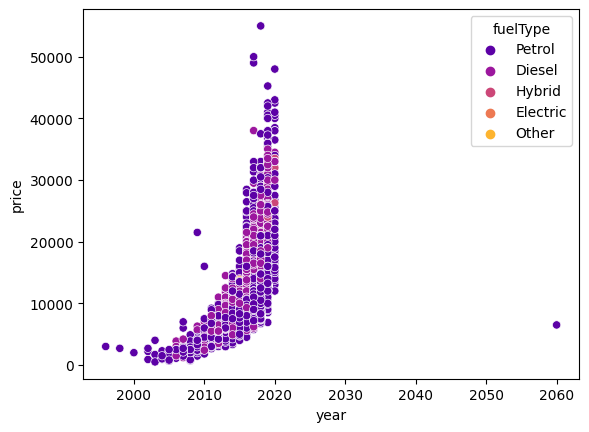

In [9]:
sns.scatterplot(x='year',y='price',data=df,hue='fuelType',palette='plasma')

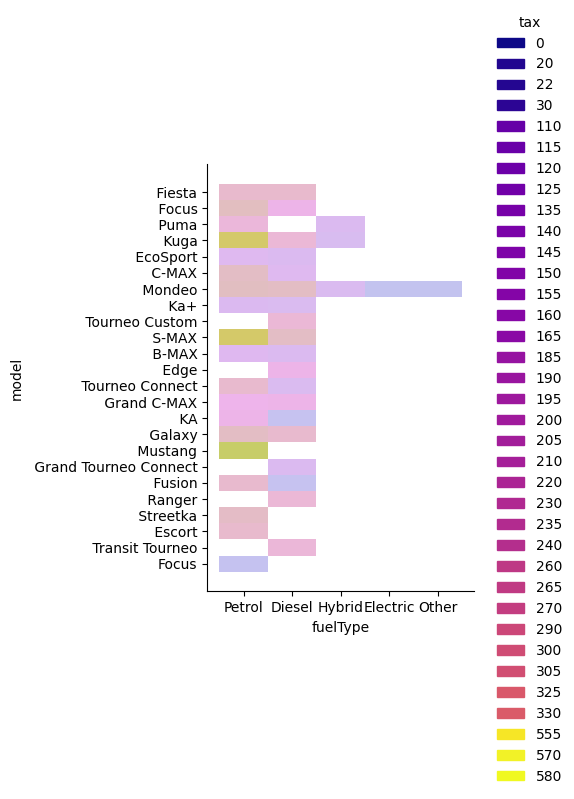

In [10]:
sns.displot(x='fuelType',y='model',data=df,palette='plasma',hue='tax')

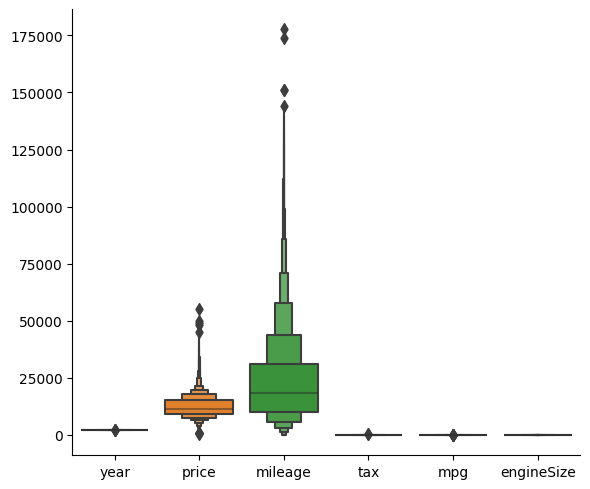

In [11]:
sns.catplot(data=df,kind='boxen',height=5,aspect=1.2)

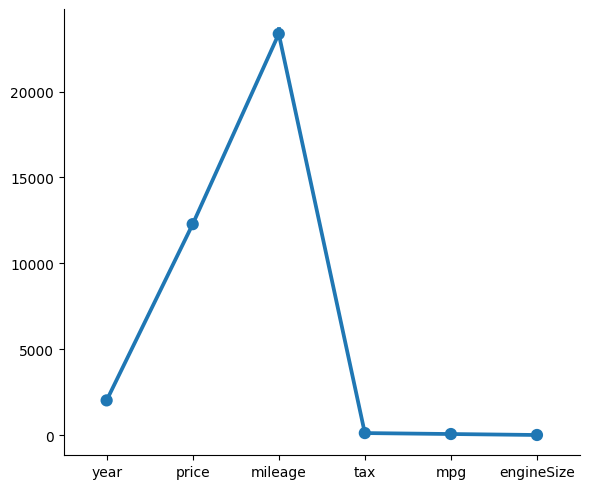

In [12]:
sns.catplot(data=df,kind='point',height=5,aspect=1.2)

In [14]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from 

In [16]:
X=fn.drop(['price'],axis='columns')
y=fn['price']

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20)

In [18]:
def get_score(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [19]:
get_score(LinearRegression(),X_train,X_test,y_train,y_test)

0.7371724096005281